# Sobel Image Filter Pipeline
### By Lieb Mathieson
<hr>

## Instructions
### Sobel Pipeline with Noise Reduction

<ol>
<li>Grayscale conversion: The input image is first converted into a grayscale image to simplify the processing.</li>

<li>Noise reduction: Various techniques can be used to reduce noise in the image, such as Gaussian blur, median filtering, or bilateral filtering. These techniques help to smooth out the image and reduce the impact of noise on the edge detection process.</li>

<li>Horizontal and vertical Sobel filtering: The Sobel operator is applied to the noise-reduced grayscale image in both the horizontal and vertical directions. The Sobel operator is a small 3x3 matrix that is convolved with the image. The result of this convolution highlights edges in the image.</li>

<li>Magnitude calculation: The horizontal and vertical edge maps are combined to obtain a single edge map. This is done by calculating the magnitude of the gradient at each pixel. The magnitude is computed using the Pythagorean theorem, which involves taking the square root of the sum of the squares of the horizontal and vertical gradients.<br>
</li>

<li>Thresholding: Finally, a threshold is applied to the edge map to produce a binary image, where the edges are represented by white pixels and the non-edges are represented by black pixels. This threshold is usually set to a value that separates the edges from the non-edges based on the magnitude of the gradient.</li>

</ol>

In [111]:
# Import Libraries

import numpy as np
import cv2
from cv2 import magnitude, Sobel
import matplotlib.pyplot as plt


#### 1. Grayscale Conversion

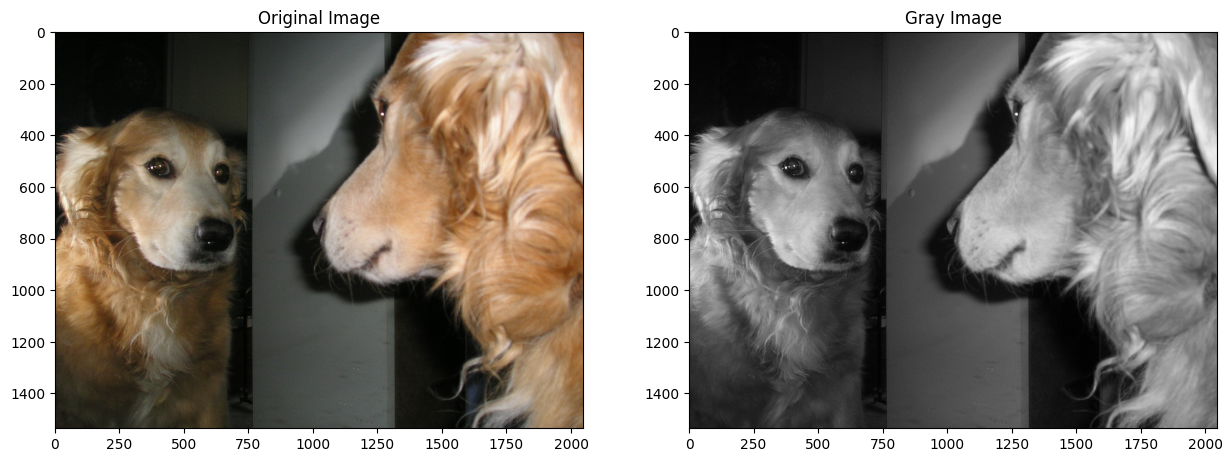

In [112]:
# 1 grayscale conversion
img = cv2.imread('../Images/NICO_looks_at_himself.jpg') # remove '../images/' as needed
color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Image must be converted to gray in order to detect edges with the Sobel filter.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Plot
fig = plt.figure(figsize=(15,15))

fig.add_subplot(1,2,1)
plt.imshow(color)
plt.title('Original Image')

fig.add_subplot(1,2,2)
plt.title('Gray Image')
plt.imshow(gray, cmap='gray')

#### 2. Noise Reduction

Text(0.5, 1.0, 'Built in CV2 GaussianBlur, Kernal size 5x5')

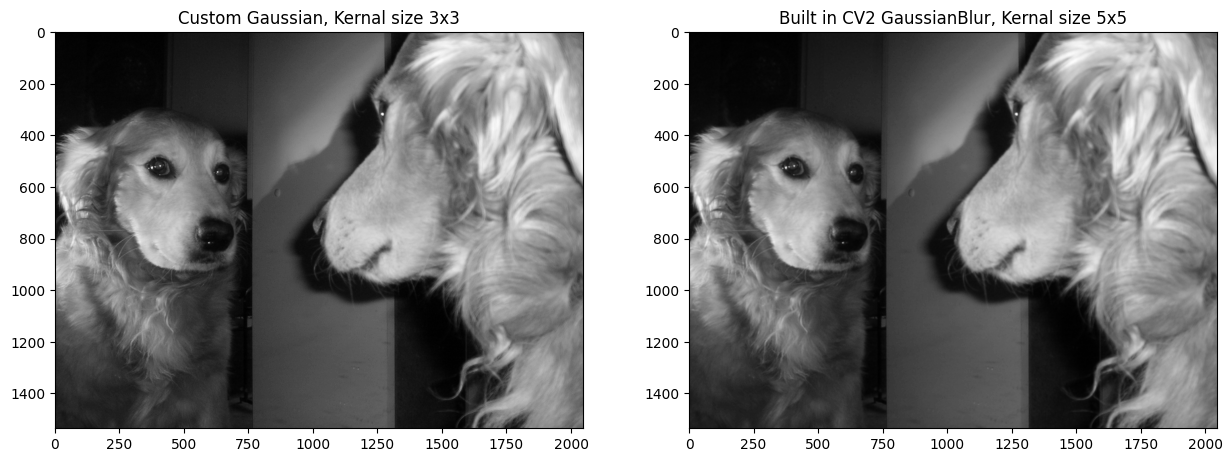

In [113]:
# 2 Noise reduction
gaussian_filter = np.array([[1,2,1], [2,4,2], [1,2,1]], dtype=np.float32 )/16
imgGaussian = cv2.filter2D(gray, -1, gaussian_filter)

# Another method of achieving this effect is to invoke the built-in GaussianBlur filter from cv2
blur = cv2.GaussianBlur(gray, (5,5),cv2.BORDER_DEFAULT)

fig = plt.figure(figsize=(15,15))

fig.add_subplot(1,2,1)
plt.imshow(imgGaussian, cmap='gray')
plt.title('Custom Gaussian, Kernal size 3x3')

fig.add_subplot(1,2,2)
plt.imshow(blur, cmap='gray')
plt.title('Built in CV2 GaussianBlur, Kernal size 5x5')

#### 3. Horizontal & Vertical Sobel Filtering

Text(0.5, 1.0, 'Sobel on Y-axis')

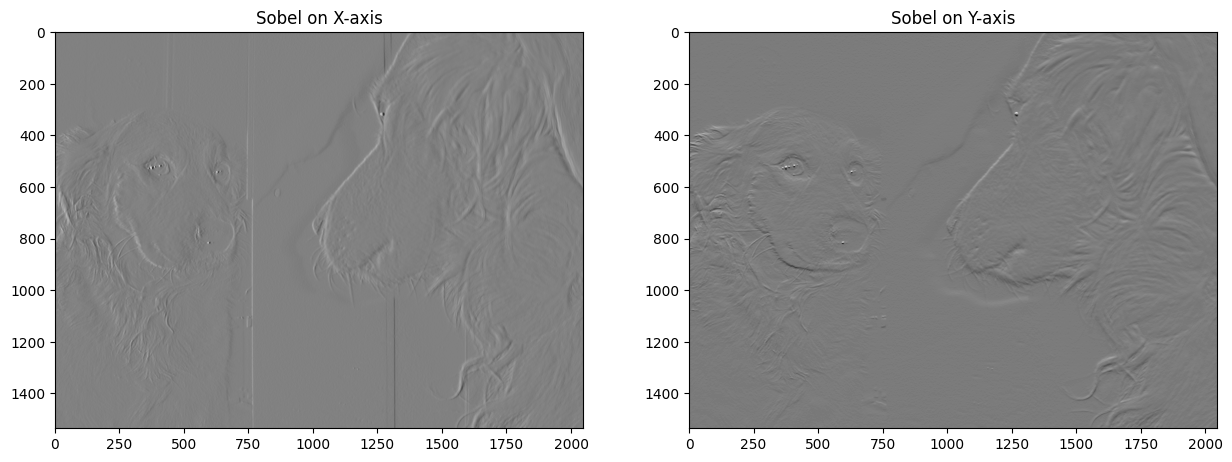

In [114]:
# 3 Height and Width Sobel kernals filter

# Method 1 (unused):
    #kernalX = np.array([[1,0,1], [-2,0,2], [-1,0,1]], dtype=np.float32)
    #kernalY = np.array([[-1,-2,-1], [0,0,0], [1,2,1]], dtype=np.float32)
    #imgSobelX = cv2.filter2D(img, -1, kernalX)
    #imgSobelY = cv2.filter2D(img, -1, kernalY)

# Method 2:
sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)

# Plot
fig = plt.figure(figsize=(15,15))

fig.add_subplot(1,2,1)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel on X-axis')

fig.add_subplot(1,2,2)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel on Y-axis')

# Seems useful for normal maps

#### 4. Magnitude Calculation

Text(0.5, 1.0, 'Sobel Filter applied')

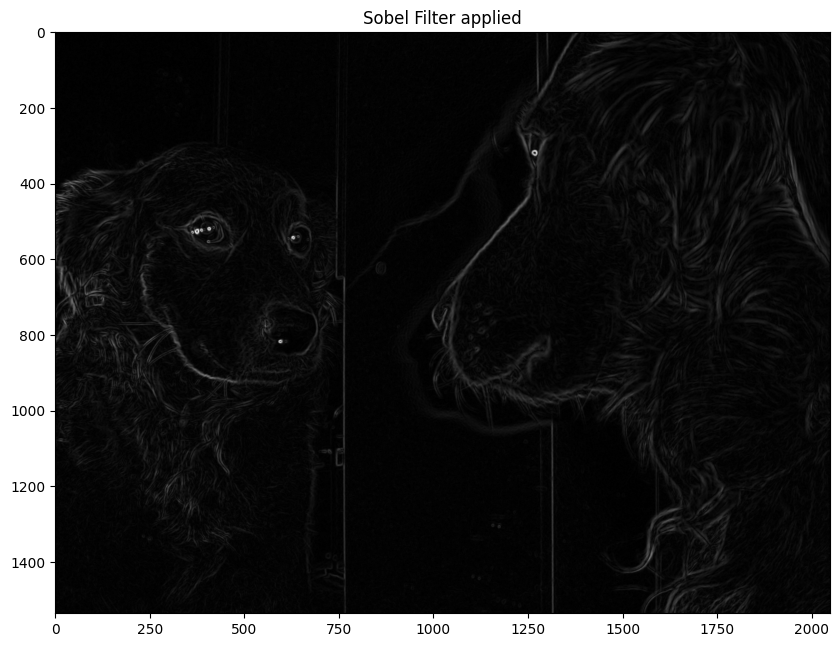

In [115]:
# 4 Magnitude Calc : G = SQRT(G^2x + G^2y)
mag = cv2.magnitude(sobelx, sobely)
 
# or mag = np.sqrt(sobelx**2 + sobely**2)

# Plot
fig = plt.figure(figsize=(10,10))
plt.imshow(mag, cmap='gray')
plt.title('Combined Sobel Filter applied')


#### 5. Threshholding

In [120]:
# Determine threshold value
thresh_value = 25
# 25 looks nice enough 

# Threshhold image
val, thresh = cv2.threshold(mag, thresh_value, 255, cv2.THRESH_BINARY)


## Final Output

Text(0.5, 1.0, 'Threshold')

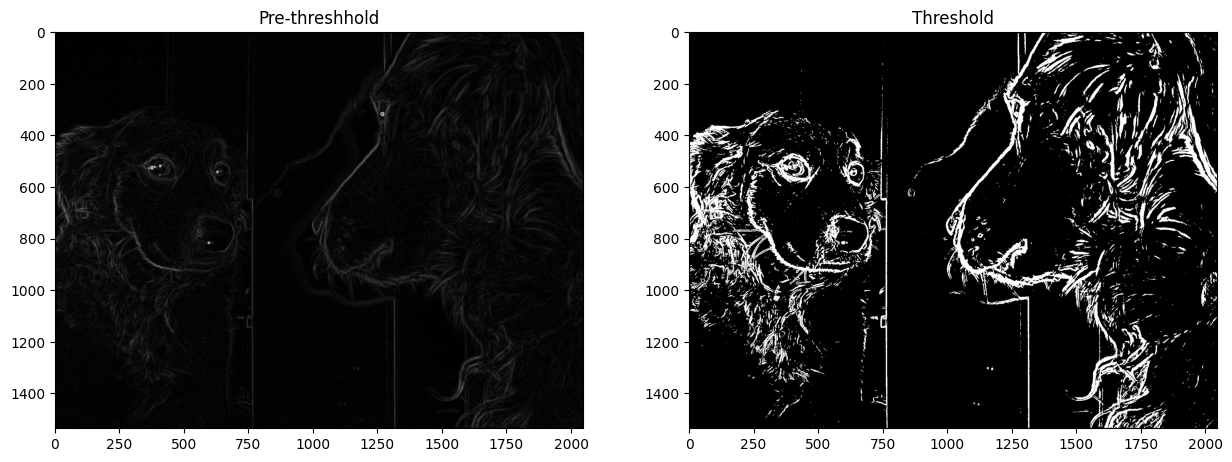

In [122]:
fig = plt.figure(figsize=(15,15))

fig.add_subplot(1,2,1)
plt.imshow(mag, cmap='gray')
plt.title('Pre-threshhold')

fig.add_subplot(1,2,2)
plt.imshow(thresh, cmap='gray')
plt.title('Threshold')